In [2]:
import torch
from torch import nn
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tslearn
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

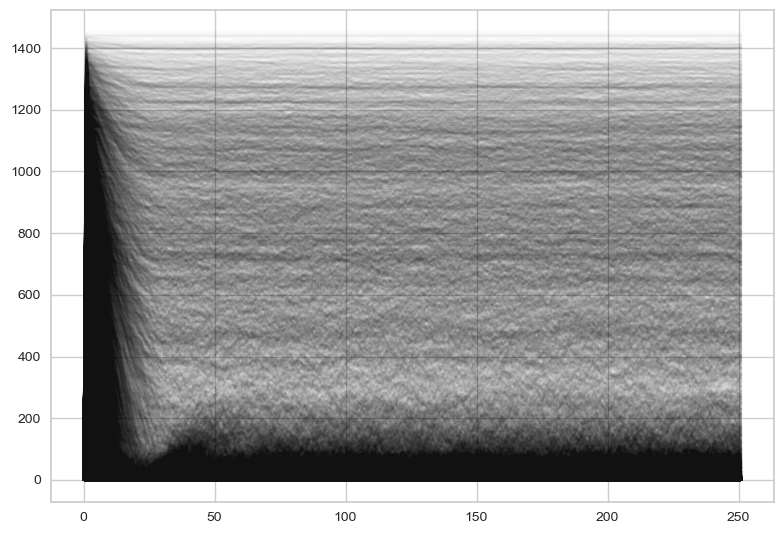

In [5]:
data_output = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_outputs_active.csv", header=None)

#scaler = MinMaxScaler()
#data_output_scaled = scaler.fit_transform(data_output)
#data_output = pd.DataFrame(data_output_scaled)

# --- Load the conditioning input parameters ---
data_input = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_inputs.csv", sep=" ", header=None)

# --- Combine input + output ---
data = pd.concat([data_input, data_output], axis=1)

# --- Sample to 1280 examples if needed ---
data = data.sample(n=20000, random_state=1)

# --- Split into training and validation sets ---
train_data_pd, valid_data = train_test_split(data, test_size=0.2, random_state=42)

df = to_time_series_dataset(train_data_pd.iloc[:, 3:].values)
plt.figure()
for ts in df:
    plt.plot(ts.ravel(), "k-", alpha=.025)
plt.tight_layout()
plt.show()

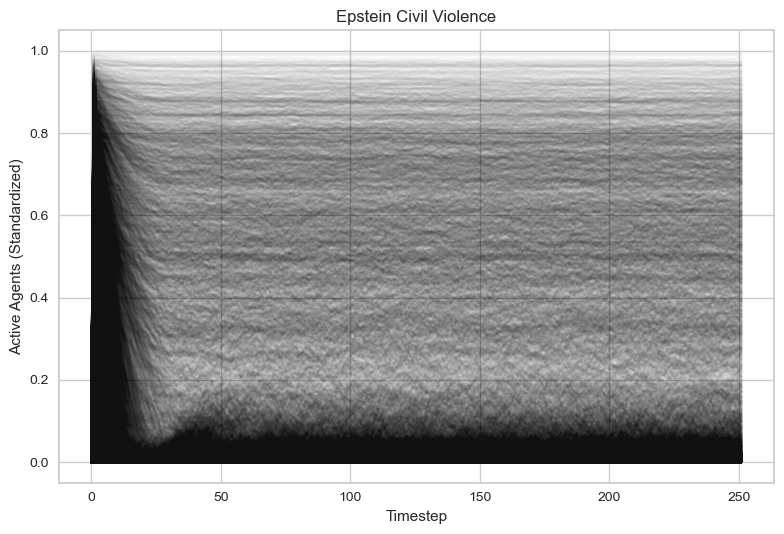

In [6]:
data_output = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_outputs_active.csv", header=None)

scaler = MinMaxScaler()
data_output_scaled = scaler.fit_transform(data_output)
data_output = pd.DataFrame(data_output_scaled)

# --- Load the conditioning input parameters ---
data_input = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_inputs.csv", sep=" ", header=None)

# --- Combine input + output ---
data = pd.concat([data_input, data_output], axis=1)

# --- Sample to 1280 examples if needed ---
data = data.sample(n=20000, random_state=1)

# --- Split into training and validation sets ---
train_data_pd, valid_data = train_test_split(data, test_size=0.2, random_state=42)

df = to_time_series_dataset(train_data_pd.iloc[:, 3:].values)
plt.figure()
for ts in df:
    plt.plot(ts.ravel(), "k-", alpha=.025)
plt.xlabel('Timestep') 
plt.ylabel('Active Agents (Standardized)') 
plt.title('Epstein Civil Violence')
plt.tight_layout()
#plt.show()
plt.savefig("ecv_trends.png")

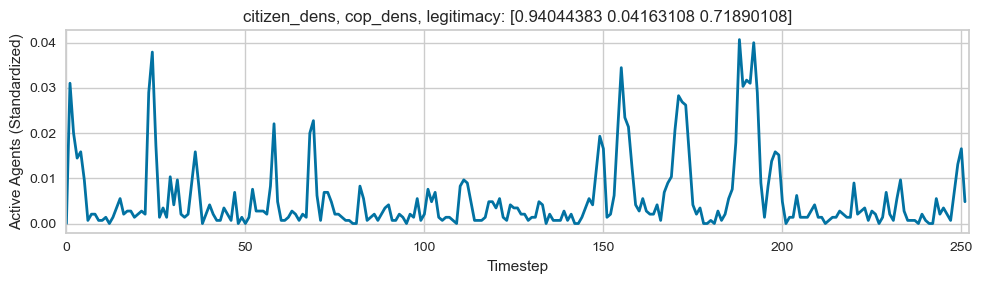

In [78]:
index = 7
plt.figure(figsize=(10, 3))
plt.plot(train_data_pd.iloc[index, 3:].values, linewidth=2)
# Set the axis limits based on global min and max
plt.xlim(0, len(train_data_pd.iloc[index, 3:].values))  # Standardize x-axis (if you know your x range)
#plt.ylim(-0.05, 0.9)

plt.title(f"citizen_dens, cop_dens, legitimacy: {train_data_pd.iloc[index, :3].values}")
plt.xlabel('Timestep') 
plt.ylabel('Active Agents (Standardized)') 
plt.tight_layout()
plt.savefig("ecv_trend1.png")

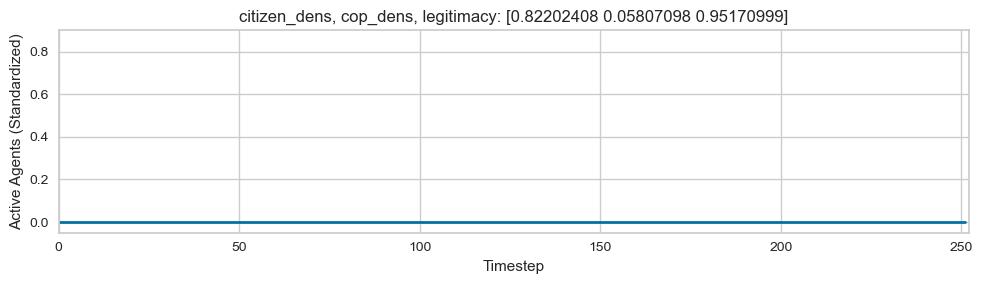

In [71]:
index = 10
plt.figure(figsize=(10, 3))
plt.plot(train_data_pd.iloc[index, 3:].values, linewidth=2)
# Set the axis limits based on global min and max
plt.xlim(0, len(train_data_pd.iloc[index, 3:].values))  # Standardize x-axis (if you know your x range)
plt.ylim(-0.05, 0.9)  # Standardize y-axis

plt.title(f"citizen_dens, cop_dens, legitimacy: {train_data_pd.iloc[index, :3].values}")
plt.xlabel('Timestep') 
plt.ylabel('Active Agents (Standardized)') 
plt.tight_layout()
plt.savefig("ecv_trend2.png")

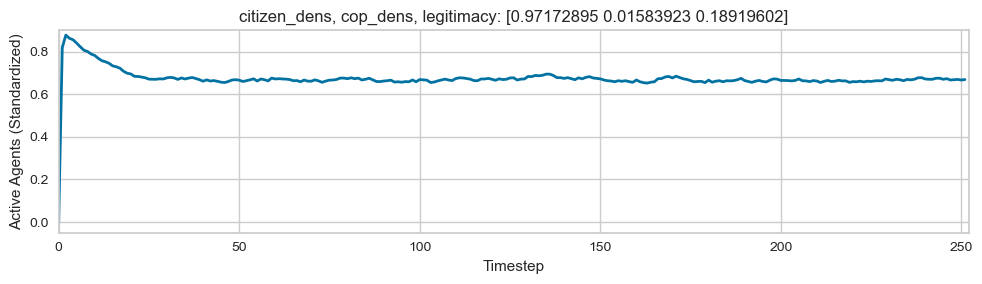

In [72]:
index = 12
plt.figure(figsize=(10, 3))
plt.plot(train_data_pd.iloc[index, 3:].values, linewidth=2)
# Set the axis limits based on global min and max
plt.xlim(0, len(train_data_pd.iloc[index, 3:].values))  # Standardize x-axis (if you know your x range)
plt.ylim(-0.05, 0.9)

plt.title(f"citizen_dens, cop_dens, legitimacy: {train_data_pd.iloc[index, :3].values}")
plt.xlabel('Timestep') 
plt.ylabel('Active Agents (Standardized)') 
plt.tight_layout()
plt.savefig("ecv_trend3.png")

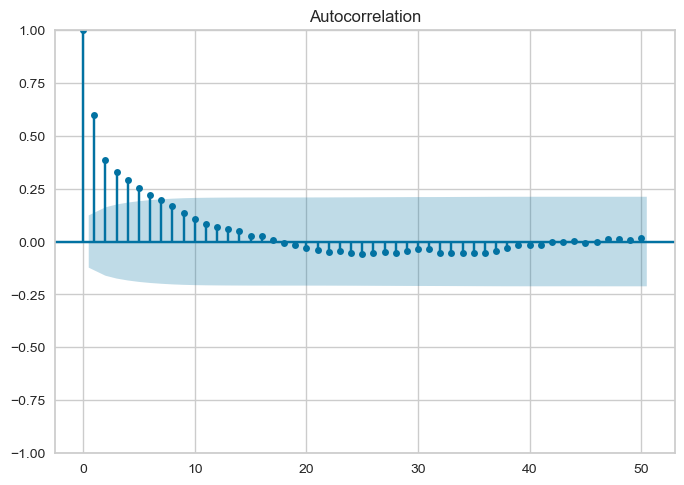

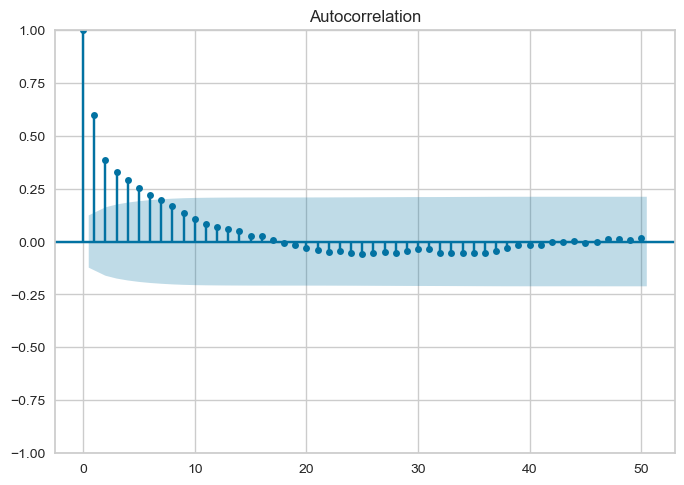

In [13]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
index=1
acf_values = acf(train_data_pd.iloc[index, 3:].values, nlags=50)
plot_acf(train_data_pd.iloc[index, 3:].values, lags=50)

In [16]:
result = adfuller(train_data_pd.iloc[1, 3:].values)

In [17]:
result

(-7.227994223320394,
 2.0292189415440402e-10,
 1,
 250,
 {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
 -1679.294823785584)

In [18]:
from statsmodels.tsa.seasonal import STL
stl = STL(train_data_pd.iloc[1, 3:].values)
result = stl.fit()
trend = result.trend
seasonal = result.seasonal
resid = result.resid

ValueError: Unable to determine period from endog

In [ ]:
import antropy as ant
sampen = ant.sample_entropy(df[3])

In [ ]:
data_output = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_outputs_poor.csv", header=None)

#scaler = MinMaxScaler()
#data_output_scaled = scaler.fit_transform(data_output)
#data_output = pd.DataFrame(data_output_scaled)

# --- Load the conditioning input parameters ---
data_input = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_inputs.csv", sep=" ", header=None)

# --- Combine input + output ---
data = pd.concat([data_input, data_output], axis=1)

# --- Sample to 1280 examples if needed ---
data = data.sample(n=10000, random_state=1)

# --- Split into training and validation sets ---
train_data_pd, valid_data = train_test_split(data, test_size=0.2, random_state=42)

df = to_time_series_dataset(train_data_pd.iloc[:, 3:].values)
plt.figure()
for ts in df:
    plt.plot(ts.ravel(), "k-", alpha=.01)
plt.tight_layout()
plt.show()

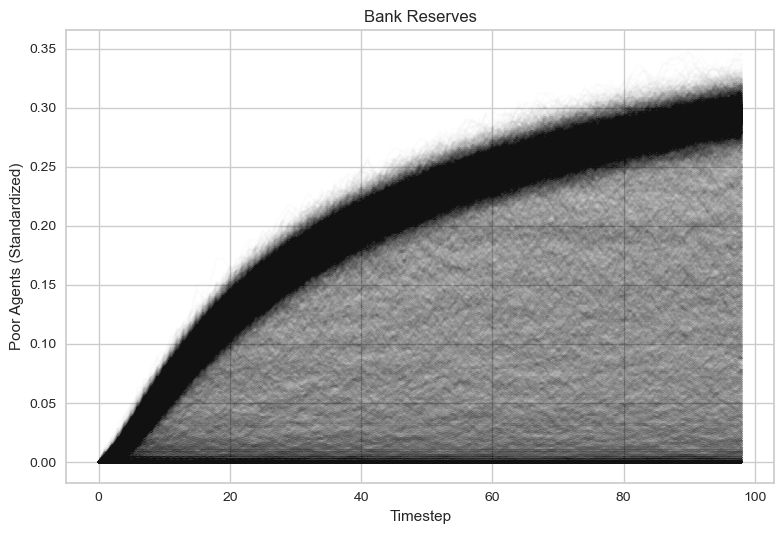

In [79]:
data_output = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_outputs_poor.csv", header=None)
data_output_helper = data_output
new_row = [500] * data_output_helper.shape[1]
data_output_helper.loc[len(data_output_helper)] = new_row
scaler = MinMaxScaler()
scaler.fit(data_output_helper)
data_output_scaled = scaler.transform(data_output)
data_output = pd.DataFrame(data_output_scaled)

# --- Load the conditioning input parameters ---
data_input = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_inputs.csv", sep=" ", header=None)

# --- Combine input + output ---
data = pd.concat([data_input, data_output], axis=1)

# --- Sample to 1280 examples if needed ---
data = data.sample(n=10000, random_state=1)

# --- Split into training and validation sets ---
train_data_pd, valid_data = train_test_split(data, test_size=0.2, random_state=42)

df = to_time_series_dataset(train_data_pd.iloc[:, 3:].values)
plt.figure()
for ts in df:
    plt.plot(ts.ravel(), "k-", alpha=.01)
plt.xlabel('Timestep') 
plt.ylabel('Poor Agents (Standardized)') 
plt.title('Bank Reserves')
plt.tight_layout()
#plt.show()
plt.savefig("br_trends.png")

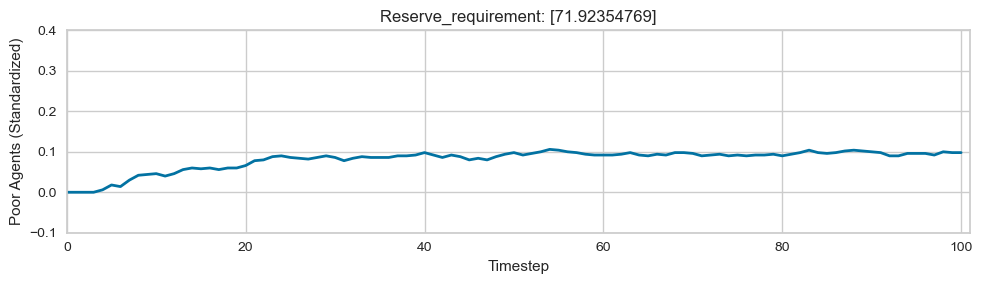

In [80]:
index = 10
plt.figure(figsize=(10, 3))
plt.plot(train_data_pd.iloc[index, 1:].values, linewidth=2)
# Set the axis limits based on global min and max
plt.xlim(0, len(train_data_pd.iloc[index, 1:].values))  # Standardize x-axis (if you know your x range)
plt.ylim(-0.1, 0.4)

plt.title(f"Reserve_requirement: {train_data_pd.iloc[index, :1].values}")
plt.xlabel('Timestep') 
plt.ylabel('Poor Agents (Standardized)') 
plt.tight_layout()
plt.savefig("br_trend1.png")

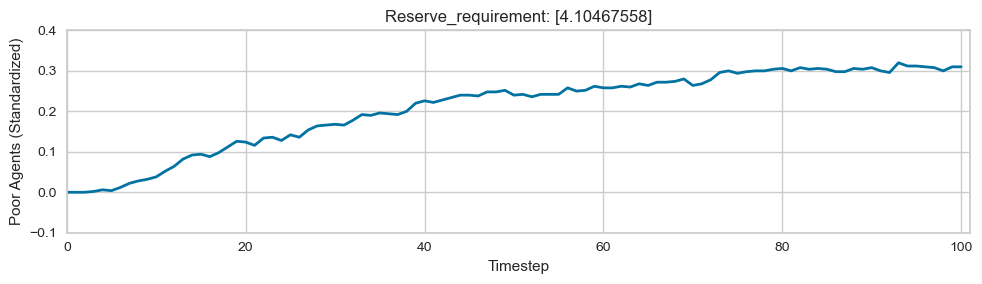

In [81]:
index = 0
plt.figure(figsize=(10, 3))
plt.plot(train_data_pd.iloc[index, 1:].values, linewidth=2)
# Set the axis limits based on global min and max
plt.xlim(0, len(train_data_pd.iloc[index, 1:].values))  # Standardize x-axis (if you know your x range)
plt.ylim(-0.1, 0.4)

plt.title(f"Reserve_requirement: {train_data_pd.iloc[index, :1].values}")
plt.xlabel('Timestep') 
plt.ylabel('Poor Agents (Standardized)') 
plt.tight_layout()
plt.savefig("br_trend2.png")
plt.show()

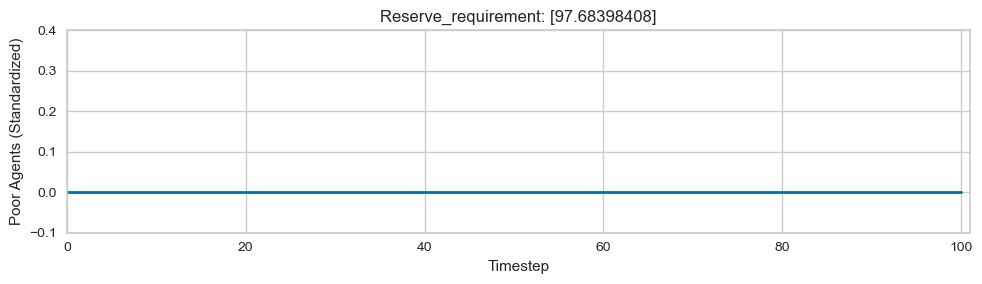

In [82]:
index = 3
plt.figure(figsize=(10, 3))
plt.plot(train_data_pd.iloc[index, 1:].values, linewidth=2)
# Set the axis limits based on global min and max
plt.xlim(0, len(train_data_pd.iloc[index, 1:].values))  # Standardize x-axis (if you know your x range)
plt.ylim(-0.1, 0.4)

plt.title(f"Reserve_requirement: {train_data_pd.iloc[index, :1].values}")
plt.xlabel('Timestep') 
plt.ylabel('Poor Agents (Standardized)') 
plt.tight_layout()
plt.savefig("br_trend3.png")
plt.show()

In [55]:
train_data_pd.head()

,0,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
37978,4.104676,0.0,0.0,0.0,0.002,0.006,0.004,0.012,0.022,0.028,...,0.300,0.296,0.320,0.312,0.312,0.310,0.308,0.300,0.310,0.310
78243,22.984424,0.0,0.0,0.0,0.000,0.012,0.016,0.024,0.024,0.026,...,0.282,0.278,0.280,0.286,0.290,0.286,0.278,0.280,0.282,0.292
6503,15.389183,0.0,0.0,0.0,0.004,0.014,0.018,0.024,0.026,0.036,...,0.306,0.304,0.316,0.312,0.312,0.318,0.312,0.312,0.308,0.318
58309,97.683984,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
34698,15.612570,0.0,0.0,0.0,0.002,0.004,0.008,0.010,0.024,0.038,...,0.286,0.290,0.298,0.296,0.302,0.304,0.310,0.308,0.306,0.310
